In [17]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [18]:
# read in the data. import data
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [19]:
# function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [20]:
df.shape

(1460, 81)

In [21]:
numerical_features = df. select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
# summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T

# call the function to create the scrollable HTML table
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

# display the table as HTML
display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [23]:
# summary statistic for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T

# call the function to create the scrollable HTML table
html_categorical =  create_scrollable_table(cat_summary_stats, 'Categorical_features', 'Summary statistics for categorical features')

# display the table as a html
display(HTML(html_categorical))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [24]:
df.shape

(1460, 81)

In [25]:
# null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

# display the results
display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [26]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


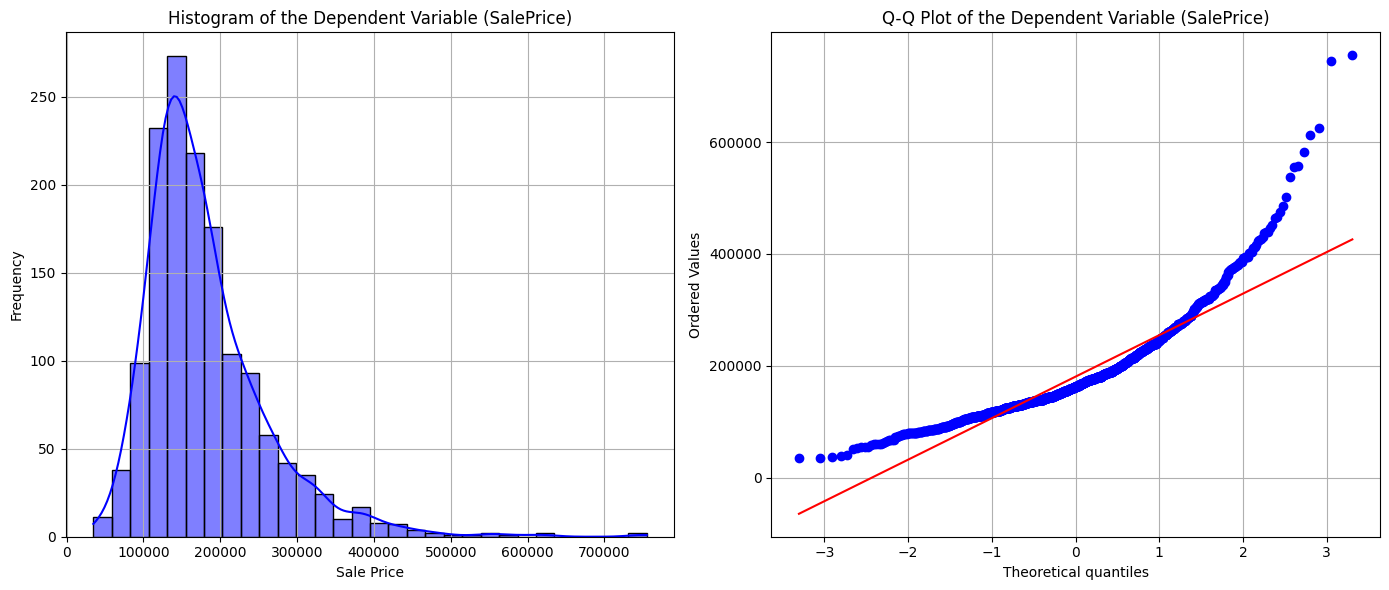

In [27]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# replace any infinite values in the DataFrame with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# assuming 'SalePrice' is the dependent variable
dependent_variable = df['SalePrice']

# create a figure with two subplots: one for the histogram and one for the Q-Q plot
plt.figure(figsize=(14, 6))

# subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(dependent_variable, bins=30, kde=True, color='blue')
plt.title('Histogram of the Dependent Variable (SalePrice)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)

# subplot 2: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(dependent_variable, dist="norm", plot=plt)
plt.title('Q-Q Plot of the Dependent Variable (SalePrice)')
plt.grid(True)

# show the plots
plt.tight_layout()
plt.show()


**WHAT QUESTIONS DO WE WANT TO ASK THE DATA?**
1. How does property size (lot area or living area) relate to sale prices?
2. Does the year a house was built or remodeled affect the sale price?
3. What is the impact of neighborhood on sale prices?
4. Do the overall quality and condition of a house impact sale price?
5. Does the presence of amenities (garage, pool, etc.) influence sale prices?

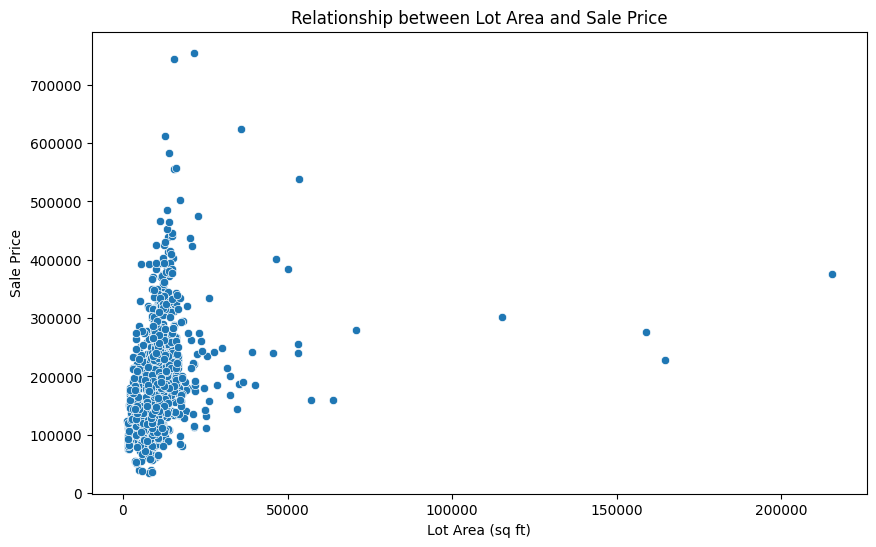

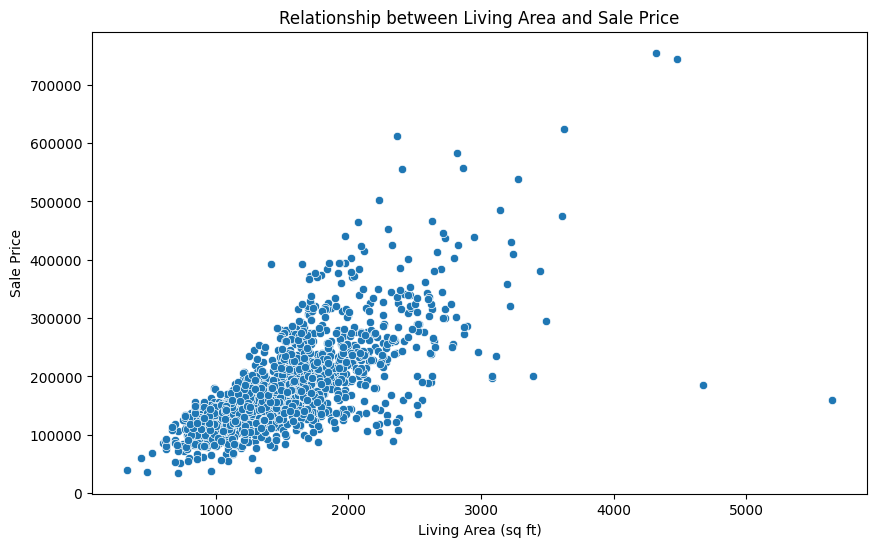

In [28]:
### 1. How does property size (lot area or living area) relate to sale prices? ###
# scatter plot: LotArea vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['LotArea'], y=df['SalePrice'])
plt.title('Relationship between Lot Area and Sale Price')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

# scatter plot: GrLivArea (Living Area) vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('Relationship between Living Area and Sale Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


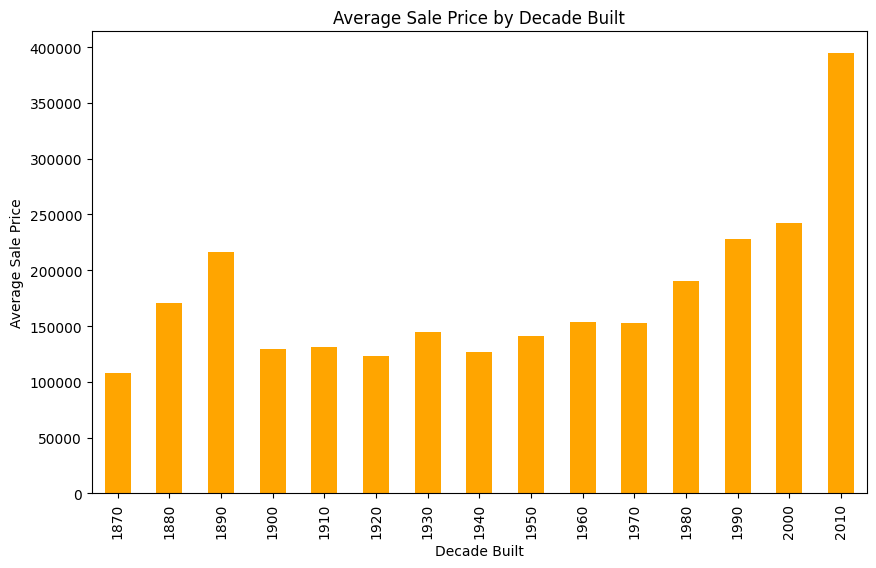

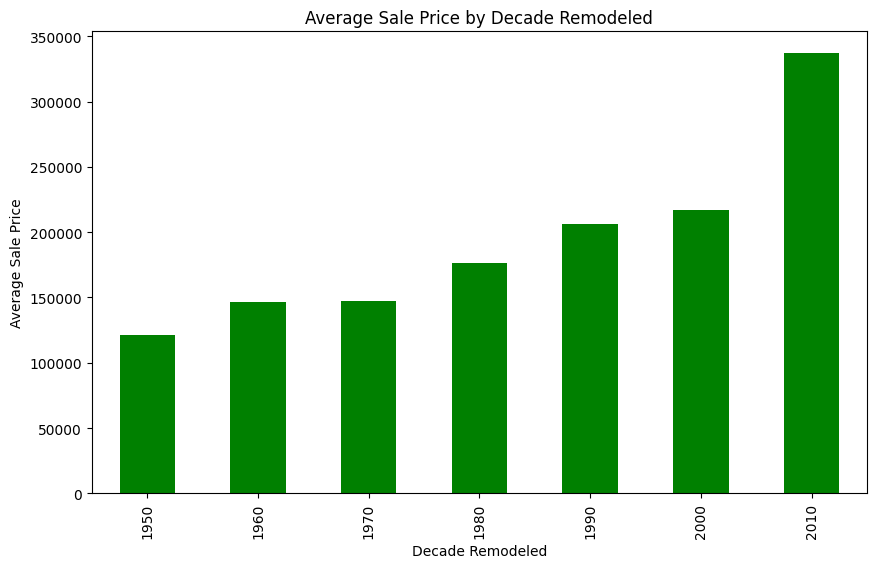

In [29]:
### 2. Does the year a house was built or remodeled affect the sale price? ###
# group data by decade to reduce clutter
df['DecadeBuilt'] = (df['YearBuilt'] // 10) * 10

# bar chart: Average SalePrice by Decade Built
decade_avg_price = df.groupby('DecadeBuilt')['SalePrice'].mean()
plt.figure(figsize=(10,6))
decade_avg_price.plot(kind='bar', color='orange')
plt.title('Average Sale Price by Decade Built')
plt.xlabel('Decade Built')
plt.ylabel('Average Sale Price')
plt.show()

# bar chart: Average SalePrice by Decade Remodeled
df['DecadeRemod'] = (df['YearRemodAdd'] // 10) * 10
decade_remod_avg_price = df.groupby('DecadeRemod')['SalePrice'].mean()
plt.figure(figsize=(10,6))
decade_remod_avg_price.plot(kind='bar', color='green')
plt.title('Average Sale Price by Decade Remodeled')
plt.xlabel('Decade Remodeled')
plt.ylabel('Average Sale Price')
plt.show()



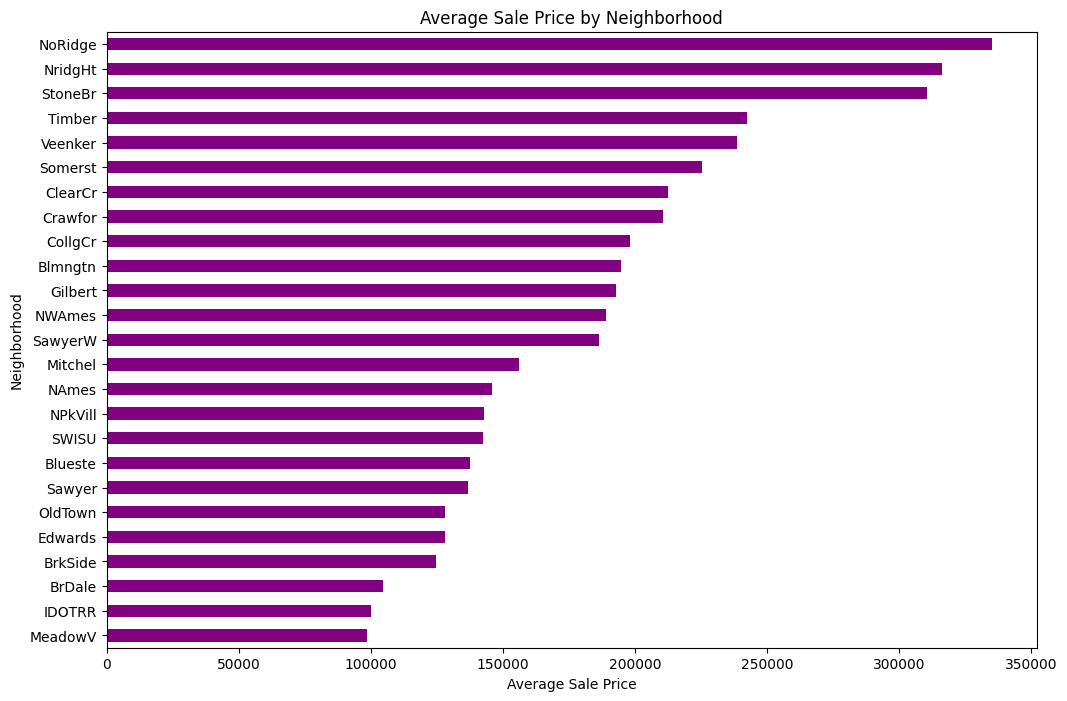

In [30]:
### What is the impact of neighborhood on sale prices? ###
# bar chart: Average SalePrice by Neighborhood
neighborhood_avg_price = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
plt.figure(figsize=(12,8))
neighborhood_avg_price.plot(kind='barh', color='purple')
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Average Sale Price')
plt.ylabel('Neighborhood')
plt.show()

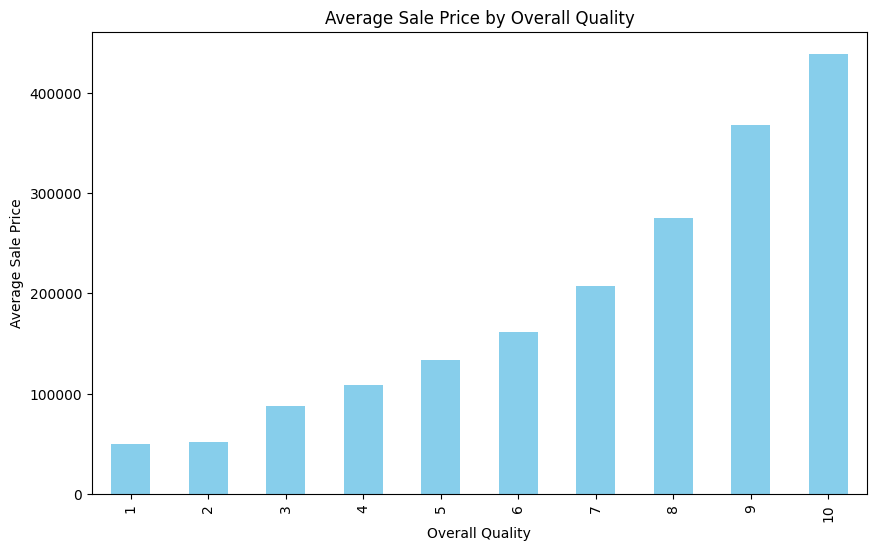

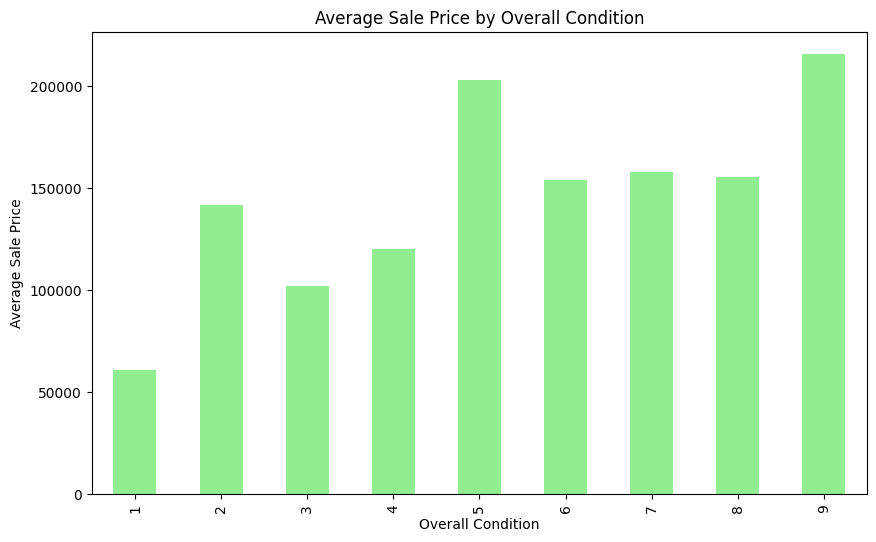

In [31]:
### 4. Do the overall quality and condition of a house impact sale price? ###
# bar plot: OverallQual (Quality) vs Average SalePrice
quality_avg_price = df.groupby('OverallQual')['SalePrice'].mean()
plt.figure(figsize=(10,6))
quality_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.show()

# bar plot: OverallCond (Condition) vs Average SalePrice
condition_avg_price = df.groupby('OverallCond')['SalePrice'].mean()
plt.figure(figsize=(10,6))
condition_avg_price.plot(kind='bar', color='lightgreen')
plt.title('Average Sale Price by Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Average Sale Price')
plt.show()

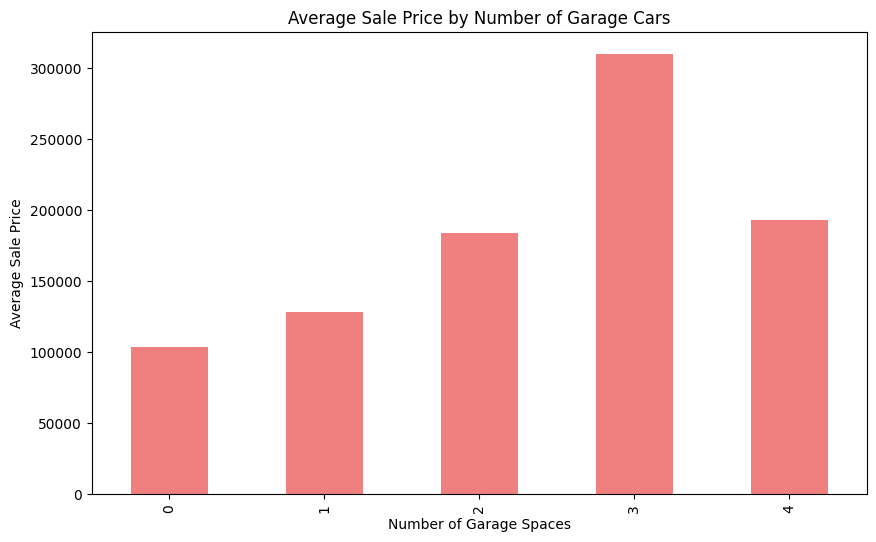

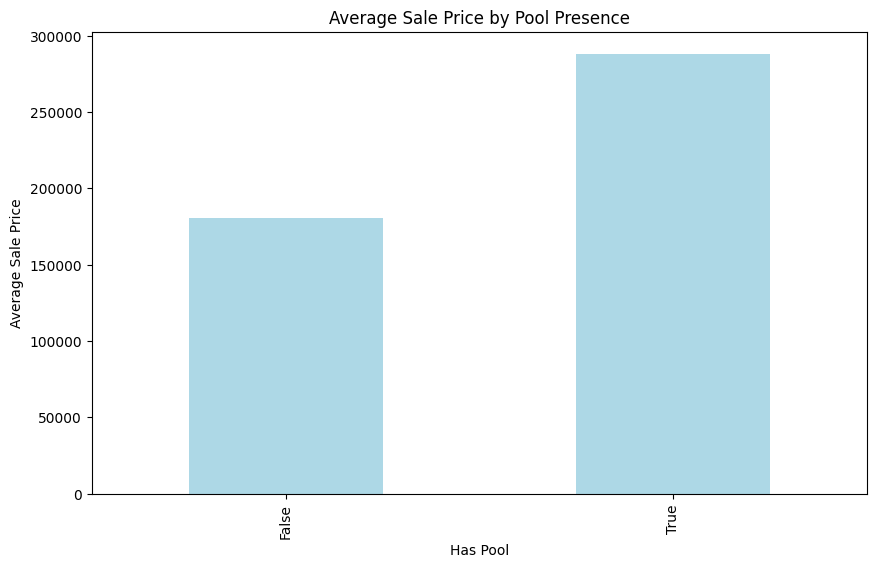

In [32]:
### 5. Does the presence of amenities (garage, pool, etc.) influence sale prices? ###


# bar chart: Garage presence vs Average Sale Price
garage_avg_price = df.groupby('GarageCars')['SalePrice'].mean()
plt.figure(figsize=(10,6))
garage_avg_price.plot(kind='bar', color='lightcoral')
plt.title('Average Sale Price by Number of Garage Cars')
plt.xlabel('Number of Garage Spaces')
plt.ylabel('Average Sale Price')
plt.show()

# bar chart: Pool presence vs Average Sale Price
df['HasPool'] = df['PoolArea'] > 0  # Create a column to indicate pool presence
pool_avg_price = df.groupby('HasPool')['SalePrice'].mean()
plt.figure(figsize=(10,6))
pool_avg_price.plot(kind='bar', color='lightblue')
plt.title('Average Sale Price by Pool Presence')
plt.xlabel('Has Pool')
plt.ylabel('Average Sale Price')
plt.show()

**Conclusion:**
1. Lot Area vs. Sale Price:

Larger lots don’t always mean higher prices. We can see that most homes with smaller lots (below 50,000 sq ft) sell for under $400,000, with a few exceptions for very large lots.

2. Living Area vs. Sale Price:

More living space means higher prices. We can see that homes with larger living areas, especially between 1,000 to 3,000 sq ft, sell for more. The price increases tend to level off for homes above 4,000 sq ft.

3. Decade Built/Remodeled vs. Sale Price:

Newer homes and recent remodels generally have higher sale prices, with homes built or remodeled after 2000 commanding the most value.

4. Neighborhood Impact:

Some neighborhoods (e.g., NoRidge, StoneBr) have much higher sale prices, while others (e.g., MeadowV) have significantly lower prices. We can see that Location matters.

5. Garage and Pool Impact:

Homes with garages or pools tend to sell for more. The more garage spaces, the higher the price, and homes with pools fetch higher prices than those without.

**Cleaning up the data and making it useable:**

In [33]:
# import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


df.columns = df.columns.str.strip()


y = df['SalePrice']  


X = df.drop(columns=['SalePrice'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


numerical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),  
    ('scale', StandardScaler())  
])


categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),  
    ('model', RandomForestRegressor())  
])

model_pipeline.fit(X_train, y_train)

predictions = model_pipeline.predict(X_test)

print(predictions)

[142734.62 322231.04 116822.58 154742.   311773.43  86225.   221573.91
 151152.16  86297.49 124685.87 158026.77 118989.83 108830.   204033.95
 180196.9  128929.5  195591.75 137312.   115887.   205340.37 166154.05
 230048.74 175439.58 123976.5  194669.15 173921.96 183724.38 104337.
 175880.47 191735.38 122957.6  244046.9  174029.46 113174.   257220.26
 145965.   143314.65 206964.98 319841.69 108386.7  123858.   237387.87
 119679.83 367966.46 133822.7  143976.74 117646.49 128431.5  393515.43
 146813.48 122041.   194794.56 120507.36 350025.66 139823.33 233352.23
 194582.   151783.42 142585.39 108858.15  75357.5  149582.15 309555.74
 289405.45 292798.08 212010.5  111434.37 302609.6  117626.   163682.34
 129800.39 133534.   114662.83  90862.   449847.01 173838.6  310182.61
 307217.76 139086.   125289.83  99375.    99454.5  125902.   105010.83
 153637.89 132946.36 255893.65 191766.9  140082.33 177414.86 145887.28
 166322.37 122137.5  262131.88 119236.89 176748.61 178993.35 161702.
 221281.95

**Visualize the cleaned-up data:**

In [34]:

df.columns = df.columns.str.strip()

# fefine the target variable 
y = df['SalePrice']  


X = df.drop(columns=['SalePrice'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


df.columns = df.columns.str.strip()

y = df['SalePrice']  

X = df.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())  
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),  
    ('model', RandomForestRegressor(random_state=42))  
])

model_pipeline.fit(X_train, y_train)

predictions = model_pipeline.predict(X_test)

print(predictions)

[141524.   332833.32 115832.5  155434.5  322610.93  85327.   208156.33
 152522.    87087.83 128847.   154042.5  120483.49 112400.   207312.25
 178626.25 130173.5  193247.97 136177.75 113848.25 206360.95 164174.
 222250.77 176689.14 125020.45 195458.35 175489.06 183954.55 105915.5
 178381.04 192647.59 121969.5  248031.8  172508.43 111238.5  254192.74
 147801.   138431.68 206245.49 317437.78 107101.8  122589.   233511.94
 120056.91 359329.78 135354.83 153360.5  115960.49 127887.   380619.2
 143119.68 122528.   196565.   128842.31 357609.86 139112.5  234502.72
 198006.4  150591.   145838.24 114936.14  75571.   151834.25 309154.55
 285469.3  283078.31 209590.36 112805.   312240.49 116814.5  162944.11
 131745.79 130862.83 113306.    93006.   458516.02 173747.54 314781.74
 294307.66 138232.25 124807.1  101166.   106224.83 127117.   103175.34
 154365.56 132976.89 252838.35 197458.28 139553.   177820.06 143227.44
 162509.92 122503.83 257245.26 119142.13 179882.38 167636.71 162740.45
 218559.19

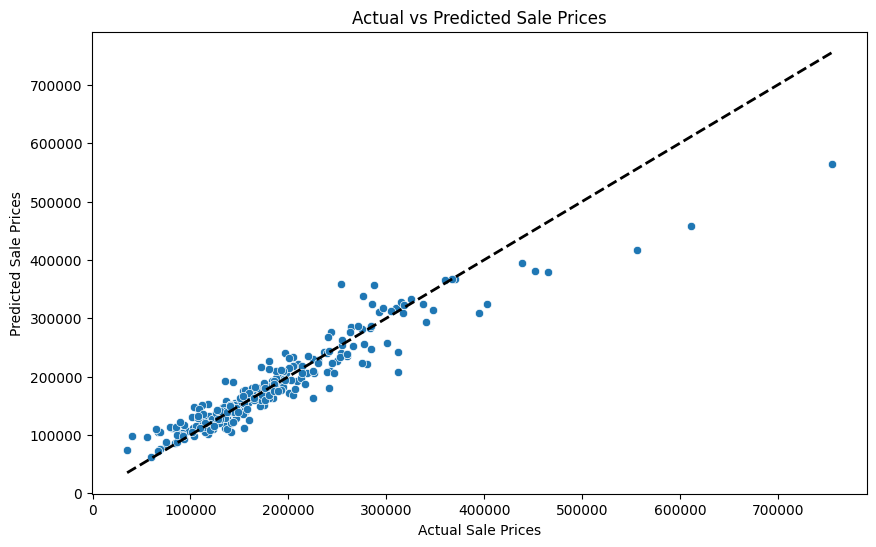

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted sale prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.show()